<a href="https://colab.research.google.com/github/nischala755/ml_project_time_series_forecasting/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install statsmodels
!pip install fbprophet        # If you want to experiment with Prophet later
!pip install tensorflow
!pip install plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 743.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running se

In [2]:
!pip install prophet


In [3]:
import yfinance as yf
import pandas as pd

# Define the ticker and period
ticker = "SPY"
start_date = "2010-01-01"
end_date = "2022-12-31"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date)

# We will forecast the 'Close' price
data = data[['Close']]
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,SPY
Date,
2010-01-04,85.768440
2010-01-05,85.995491
2010-01-06,86.056023
2010-01-07,86.419266
2010-01-08,86.706863


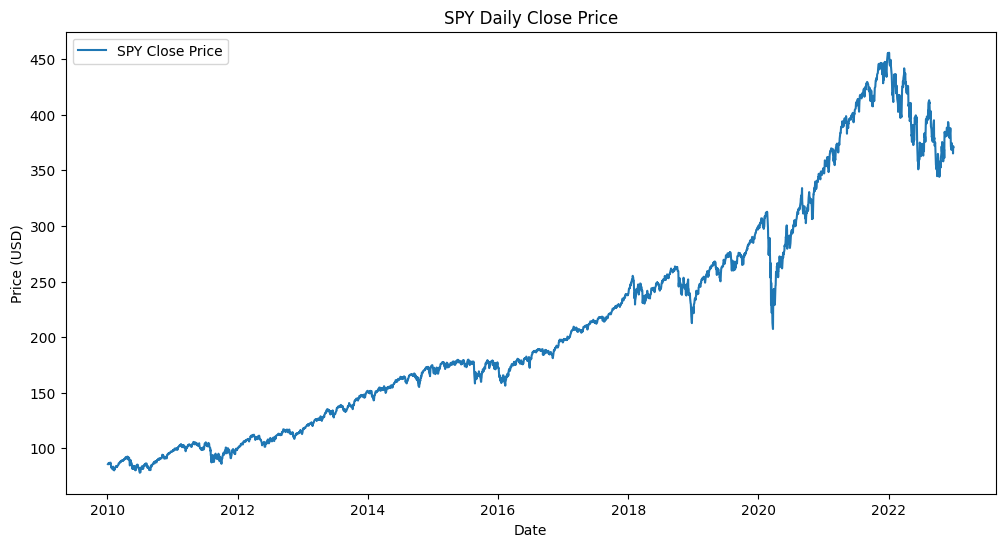

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='SPY Close Price')
plt.title("SPY Daily Close Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Convert scaled data back to DataFrame for easier manipulation
data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=['Close'])
data_scaled.head()


,Close
Date,
2010-01-04,0.020476
2010-01-05,0.021077
2010-01-06,0.021237
2010-01-07,0.022198
2010-01-08,0.022960


In [6]:
import numpy as np

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i + window_size])
        labels.append(data[i + window_size])
    return np.array(sequences), np.array(labels)

window_size = 60
X, y = create_sequences(data_scaled.values, window_size)

# Check the shapes (samples, timesteps, features)
print("X shape:", X.shape)  # Expected: (number_of_samples, 60, 1)
print("y shape:", y.shape)  # Expected: (number_of_samples, 1)


X shape: (3212, 60, 1)
y shape: (3212, 1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

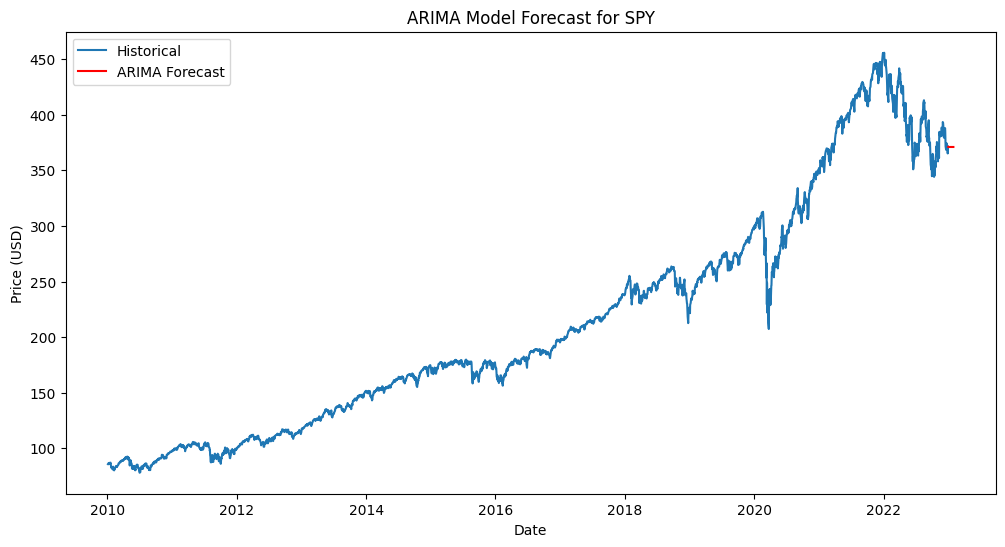

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Use the original closing prices for ARIMA
close_prices = data['Close']

# Determine p, d, q manually or use auto_arima for finding optimal parameters
# For this example, we use a simple (1,1,1) configuration.
model_arima = sm.tsa.ARIMA(close_prices, order=(1, 1, 1))
model_fit_arima = model_arima.fit()

# Forecast the next 30 days
forecast_steps = 30
forecast_arima = model_fit_arima.forecast(steps=forecast_steps)

# Plot ARIMA forecast
plt.figure(figsize=(12,6))
plt.plot(close_prices.index, close_prices, label='Historical')

# Adjusted date_range line with 'inclusive' parameter:
forecast_dates = pd.date_range(close_prices.index[-1], periods=forecast_steps+1, inclusive='right')
plt.plot(forecast_dates, forecast_arima, label='ARIMA Forecast', color='red')

plt.title("ARIMA Model Forecast for SPY")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model structure
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Display model architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% validation) while preserving time order
split_index = int(0.8 * len(X))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val, y_val))


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0117 - val_loss: 8.1947e-04
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 9.2880e-04 - val_loss: 6.5441e-04
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 8.7576e-04 - val_loss: 7.4641e-04
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 7.4498e-04 - val_loss: 0.0016
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 7.0742e-04 - val_loss: 0.0059
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 8.3511e-04 - val_loss: 0.0043
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 6.9390e-04 - val_loss: 0.0023
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 6.6428e-04 - val_loss: 0.0019
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 6.8598e-04 - val_loss: 0.0015
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 6.2715e-04 - val_loss: 5.5818e-04
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 5.9642e-04 - val_loss: 0.0026
Epoch 

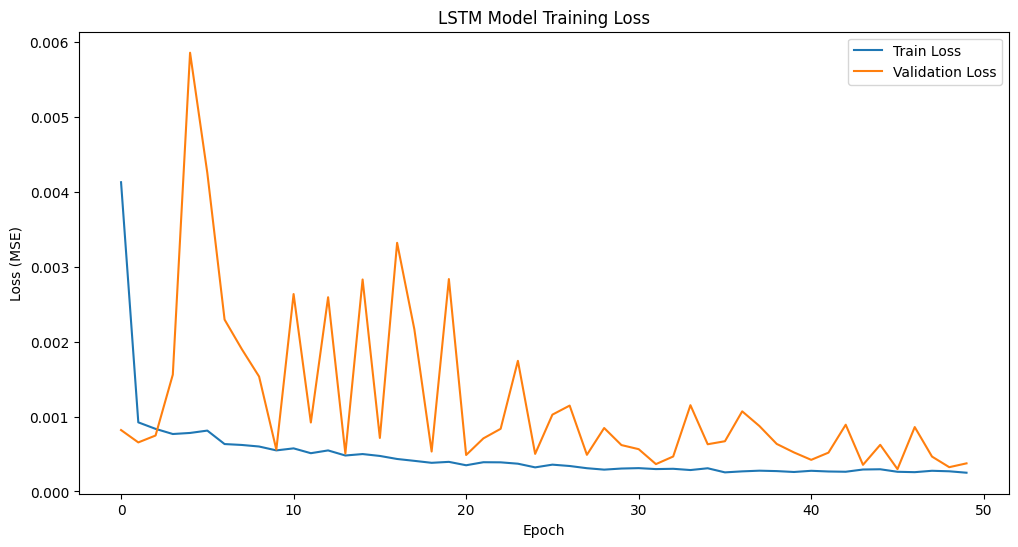

In [11]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Model Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


In [13]:
def forecast_lstm(model, data, window_size, forecast_steps):
    # Get the last window from the data
    current_window = data[-window_size:].reshape(1, window_size, 1)
    forecast = []

    for _ in range(forecast_steps):
        # Predict the next value
        prediction = model.predict(current_window)
        forecast.append(prediction[0, 0])

        # Reshape prediction to match the dimensions (1, 1, 1)
        new_val = prediction.reshape(1, 1, 1)

        # Update the window: discard the first value and append the new prediction
        current_window = np.concatenate((current_window[:, 1:, :], new_val), axis=1)

    return np.array(forecast)

# Using the function:
forecast_steps = 30
forecast_lstm_scaled = forecast_lstm(model, data_scaled.values, window_size, forecast_steps)

# Convert back to original scale
forecast_lstm_unscaled = scaler.inverse_transform(forecast_lstm_scaled.reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━

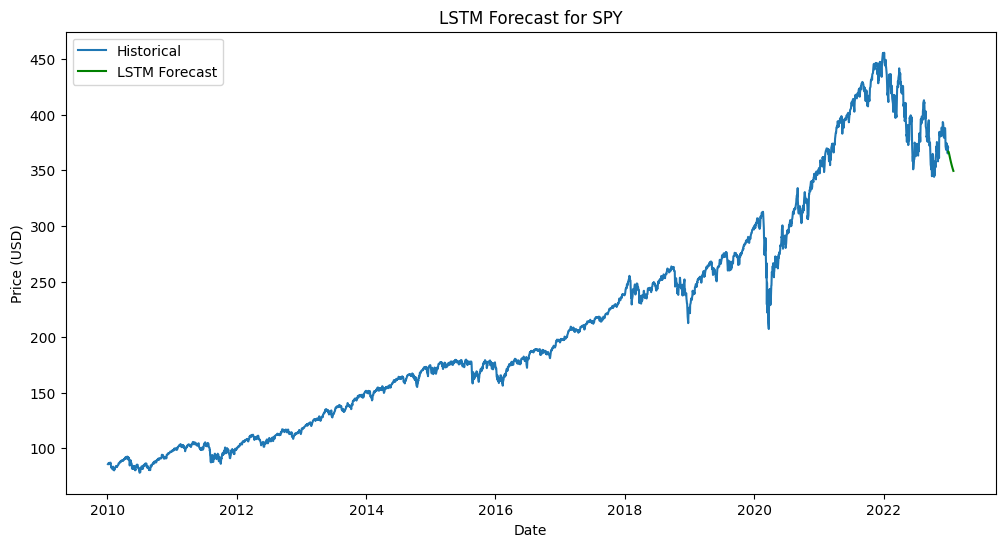

In [15]:
# Create a date range for the forecast using 'inclusive' parameter
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps+1, inclusive='right')

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Historical')
plt.plot(forecast_dates, forecast_lstm_unscaled, label='LSTM Forecast', color='green')
plt.title("LSTM Forecast for SPY")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on validation set using the LSTM model
y_pred = model.predict(X_val)
# Inverse transform predictions and true values for proper evaluation
y_pred_unscaled = scaler.inverse_transform(y_pred)
y_val_unscaled = scaler.inverse_transform(y_val)

mse = mean_squared_error(y_val_unscaled, y_pred_unscaled)
mae = mean_absolute_error(y_val_unscaled, y_pred_unscaled)
print("LSTM Validation MSE:", mse)
print("LSTM Validation MAE:", mae)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
LSTM Validation MSE: 53.45951712822678
LSTM Validation MAE: 5.827244119362366


In [19]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# Create interactive plot comparing historical and forecasted prices
fig = make_subplots(rows=1, cols=1)

# Historical data
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Close'],
    mode='lines',
    name='Historical',
    hovertemplate='Date: %{x|%Y-%m-%d}<br>Close: $%{y:.2f}<extra></extra>'  # Enhanced hover template
))

# Create forecast date ranges starting the day after the last historical date
forecast_dates_arima = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast_dates_lstm = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# ARIMA forecast
fig.add_trace(go.Scatter(
    x=forecast_dates_arima,
    y=forecast_arima,
    mode='lines+markers',
    name='ARIMA Forecast',
    hovertemplate='Date: %{x|%Y-%m-%d}<br>Forecast: $%{y:.2f}<extra></extra>'
))

# LSTM forecast
fig.add_trace(go.Scatter(
    x=forecast_dates_lstm,
    y=forecast_lstm_unscaled.flatten(),
    mode='lines+markers',
    name='LSTM Forecast',
    hovertemplate='Date: %{x|%Y-%m-%d}<br>Forecast: $%{y:.2f}<extra></extra>'
))

# Update layout with range slider and other interactive features
fig.update_layout(
    title='📈 SPY Forecast Comparison: ARIMA vs LSTM',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    template='plotly_white',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Configuration for downloadable plots via the modeBar
config = {
    'responsive': True,
    'toImageButtonOptions': {
        'format': 'png',  # Can be set to 'jpeg', 'webp', etc.
        'filename': 'SPY_Forecast_Comparison',
        'height': 600,
        'width': 800,
        'scale': 1
    }
}

fig.show(config=config)
